# Implementation of Word Vectors
#### Karthik Prakash (002728828)


# Word vectors are a way to mathematically represent the meaning of a word.

### -> A  word vector is a row of real-valued numbers where each point captures a dimension of the word's meaning and where semantically similar words have similar vectors

### -> Word vectors are created by a computer going through the text and calculating how often words show up next to each other1. They make technologies such as speech recognition and machine translation possible

### -> There are two common ways through which word vectors are generated:
### -> 1)Counts of word/context co-occurrences
### -> 2)Predictions of context given word

# Why is it Interesting ?

### -> 1) Semantic Relationships: Word vectors allow us to understand semantic relationships between words.
### -> 2) Contextual Understanding: They help in understanding the context of words in a sentence. This is a significant improvement over traditional methods which treat words as independent entities.
### -> 3) Dimensionality Reduction: Word vectors provide a compact way to represent words in a high-dimensional space. This is useful in many machine learning tasks where dealing with high dimensional data can be computationally expensive.
### -> 4) Transfer Learning: The word vectors trained on one task can be used for another task. This allows us to leverage the knowledge gained from a large amount of data and apply it to different but related problems.
### -> 5) Improving Machine Learning Models: They can significantly improve the performance of machine learning models in Natural Language Processing tasks like sentiment analysis, text classification, and named entity recognition.

# -> Different Types of Word Vectors
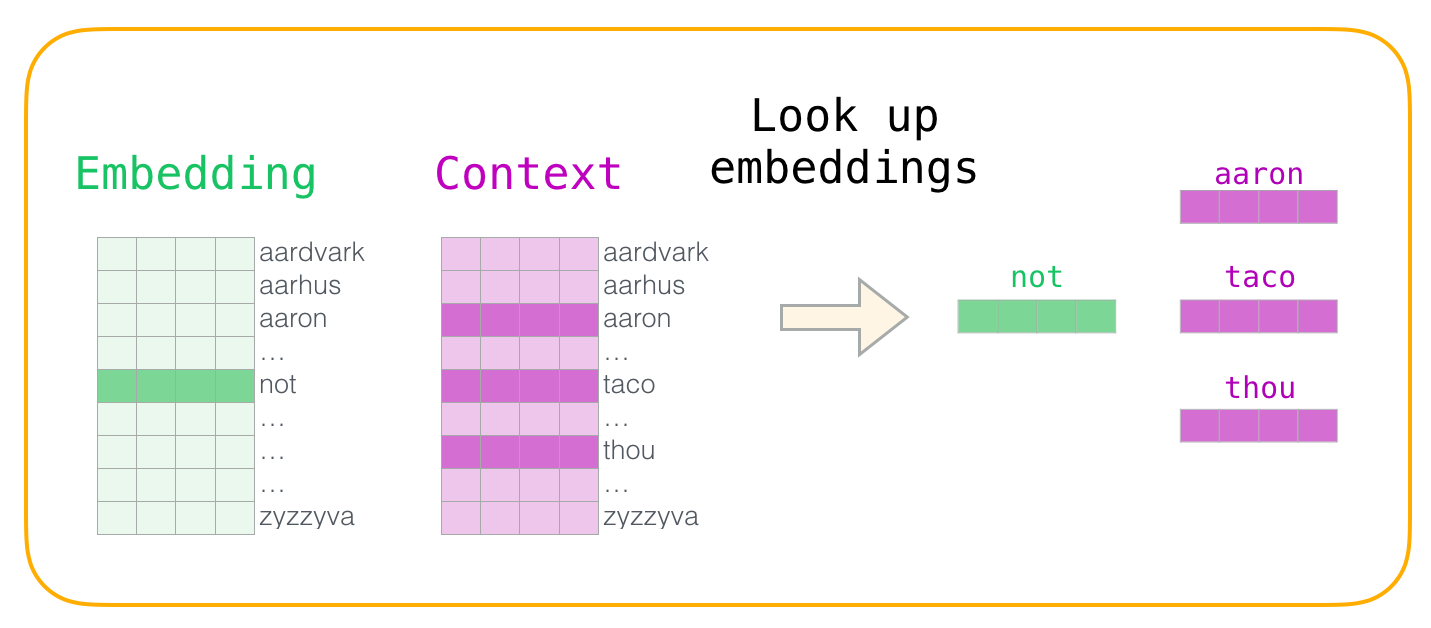



### -> 1) Word2Vec
#### -> It is used for representing words as vectors in a continuous vector space
#### -> The term "Word2Vec" is a combination of "word to vector."
#### -> The primary idea behind Word2Vec is to capture the semantic meaning of words by representing them as dense vectors in a high-dimensional space.
#### -> There are two main architectures for training Word2Vec models:
#### Continuous Bag of Words (CBOW): This model predicts a target word based on its context (surrounding words). The input to the model is a context window of surrounding words, and the output is the target word.

#### Skip-gram: This model predicts the context (surrounding words) given a target word. The input is a target word, and the output is the context words.

### -> 2) FastText
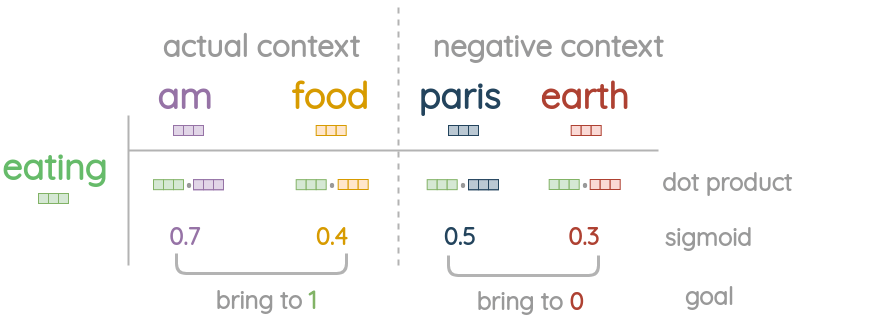
#### -> FastText is an open-source, free, lightweight library developed by Facebook's AI Research (FAIR) lab for efficient learning of word representations and sentence classification.
#### -> Here are some key features and concepts associated with FastText:
#### -> Embeddings: Like Word2Vec, FastText is used for learning word embeddings (dense vector representations) from large amounts of text data. However, FastText goes beyond Word2Vec by representing words as bags of character n-grams (subword units) instead of individual words.
#### -> Subword Embeddings: FastText introduces the concept of subword embeddings, which means that even for words not seen during training, the model can generate embeddings based on their subword components.
#### -> Supervised Text Classification: In addition to learning word representations, FastText can be used for text classification tasks. It supports supervised learning for text classification, where the goal is to assign a label to a given text based on its content.
#### -> Hierarchical Softmax: FastText employs a hierarchical softmax approach to speed up the training process. Traditional softmax involves computing probabilities for all words in the vocabulary, which can be computationally expensive for large vocabularies
#### -> Quantization: FastText supports model quantization, which helps reduce the memory footprint of the trained models.


### -> 3) Doc2Vec
#### -> Doc2Vec, short for Document to Vector, is an extension of Word2Vec that aims to generate vector representations (embeddings) for entire documents, paragraphs, or sentences.
#### -> While Word2Vec learns vector representations for individual words, Doc2Vec extends this idea to capture the semantic meaning of entire documents. The model represents each document as a fixed-size vector in a continuous vector space.
#### -> Doc2Vec is also known as Paragraph Vector because it can be applied not only to entire documents but also to paragraphs or sentences.
#### -> There are two main architectures for training Doc2Vec models:
#### -> Distributed Memory (DM): In this architecture, the model tries to predict the target word given the context words and a unique document identifier. The document identifier serves as a memory that influences the word prediction for words within that document. This allows the model to capture the overall theme or context of the document.
#### -> Distributed Bag of Words (DBOW): Unlike DM, DBOW ignores the word order within the document and predicts words based on the overall document context. It treats the document as a bag of words, and the model tries to predict words without considering the word order.
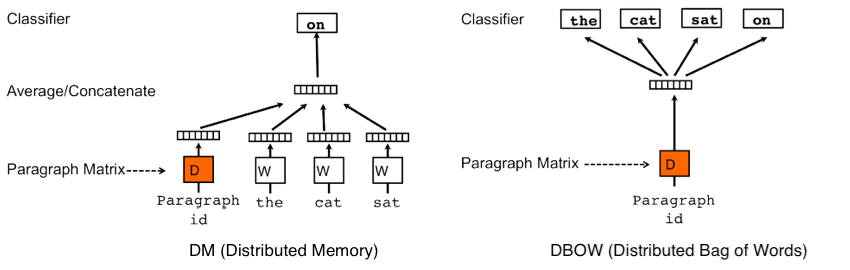





### -> What we have implemented
#### -> 1) Word2Vec: We started with Word2Vec, a method that trains a neural network model based on the context of words. It provides word vectors but does not support out-of-vocabulary words or document vectors.
#### -> 2) FastText: Next, we discussed FastText, an extension of Word2Vec that considers subword information. It can generate vectors for words not seen during training, which is useful for languages with rich morphology or handling typos.
#### -> 3) Doc2Vec: Then, we moved on to Doc2Vec, an extension of Word2Vec that provides vectors for entire documents, in addition to words. This can be useful for tasks that require understanding the context of an entire document, like document classification.
#### -> 4) Visualizing Word Vectors: Finally, we discussed how to visualize word vectors using Principal Component Analysis (PCA) and Matplotlib. This can help you understand the relationships between different words in your vector space.

In [ ]:
# We are importing necessary libraries

In [ ]:
from gensim.models import Word2Vec
from gensim.models import FastText
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
# This is our text in which we will be processing

In [ ]:
corpus = [
    'This is the first sentence',
    'This is another sentence',
    'This is the last sentence'
]

In [ ]:
# Pre processing the corpus

In [ ]:
processed_corpus = [sentence.split() for sentence in corpus]

In [ ]:
# Training the Word2Vec model

In [ ]:
model = Word2Vec(sentences=processed_corpus, vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
# Getting vector for a word

In [ ]:
vector = model.wv['sentence']

In [ ]:
print(vector)

[-5.3622725e-04  2.3643136e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588725e-03  8.9729885e-03
 -5.0154282e-03 -3.7633716e-03  7.3805046e-03 -1.5334714e-03
 -4.5366134e-03  6.5540518e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488179e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508903e-03 -3.4053659e-03 -9.4640139e-04  5.7685734e-03
 -7.5216377e-03 -3.9361035e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337686e-03 -1.9377411e-03
  8.0774371e-03 -5.9308959e-03  4.5162440e-05 -4.7537340e-03
 -9.6035507e-03  5.0072931e-03 -8.7595852e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618145e-04 -7.6612402e-03  9.6147433e-03
  4.9820580e-03  9.2331432e-03 -8.1579173e-03  4.4957981e-03
 -4.1370760e-03  8.2453608e-04  8.4986202e-03 -4.4621765e-03
  4.5175003e-03 -6.7869602e-03 -3.5484887e-03  9.3985079e-03
 -1.5776526e-03  3.2137157e-04 -4.1406299e-03 -7.6826881e-03
 -1.5080082e-03  2.46979

In [ ]:
# Now we will be finding the quality of the word vectors

In [ ]:
# Qualitative Evaluation

In [ ]:
# Find the top 5 words similar to 'sentence'
similar_words = model.wv.most_similar('sentence', topn=5)
print(similar_words)

[('first', 0.016134681180119514), ('is', -0.01083916611969471), ('last', -0.02775035798549652), ('This', -0.05234772339463234), ('another', -0.059876296669244766)]


In [ ]:
# Implementation of Word Vector using FastText

In [ ]:
corpus = [
    'This is the first sentence',
    'This is another sentence',
    'This is the last sentence'
]

In [ ]:
# Preprocessing the corpus
processed_corpus = [sentence.split() for sentence in corpus]

In [ ]:
# Train a FastText model
model = FastText(sentences=processed_corpus, vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
# Get vector for a word
vector = model.wv['sentence']

In [ ]:
print(vector)

[-1.0012314e-03  2.3569611e-03  1.0409536e-03 -1.6631888e-03
  1.9683233e-03 -1.0740025e-03  1.3170161e-03  1.2627222e-03
  7.3809795e-05 -9.9265808e-04  2.5776802e-03 -1.7871390e-04
  1.3832883e-03 -2.3745578e-03 -3.0688403e-04 -7.4558693e-04
  1.2936974e-03  6.8700477e-04 -1.1166570e-03 -7.8726053e-04
  7.8886893e-04  1.4902048e-03  4.3414251e-04  5.6531234e-04
  7.3821360e-04 -2.7080791e-03  8.8786602e-04  7.6170254e-04
 -9.0490055e-04 -2.0248949e-04 -1.8070947e-03  6.2860228e-04
  5.6036754e-04 -3.2289657e-03 -9.9195982e-04 -4.7001877e-04
  9.6502423e-04  2.7476714e-04 -2.0726179e-03  3.7762930e-04
 -6.3014042e-04 -1.7813452e-03  1.6289027e-03  1.7431584e-03
 -1.2638170e-03  3.0606662e-04 -3.1371508e-03 -6.0104055e-04
  1.9681697e-04  1.0879160e-03 -1.7816564e-03 -1.1390281e-03
 -1.3294938e-03 -3.8955713e-04  2.0285568e-05 -1.4684005e-03
 -2.7513437e-04 -5.6187616e-04 -1.5809125e-03  2.7885378e-04
 -1.3404741e-03  2.6776767e-04  7.4448809e-04 -4.5925262e-04
  5.5392110e-04  1.88929

In [ ]:
# Qualitative Evaluation

In [ ]:
# Find the top 5 words similar to 'sentence'
similar_words = model.wv.most_similar('sentence', topn=5)
print(similar_words)

[('This', 0.15588605403900146), ('the', 0.09851644188165665), ('another', 0.06687504053115845), ('is', 0.017975319176912308), ('first', 0.01360683236271143)]


In [ ]:
# We will be implementing word vector using Doc2Vec

In [ ]:
corpus = [
    'This is the first sentence',
    'This is another sentence',
    'This is the last sentence'
]

In [ ]:
# Preprocessing the corpus and tagging the documents
tagged_corpus = [TaggedDocument(words=sentence.split(), tags=[str(i)]) for i, sentence in enumerate(corpus)]


In [ ]:
# Train a Doc2Vec model
model = Doc2Vec(tagged_corpus, vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
# Get vector for a word
vector = model.wv['sentence']

In [ ]:
print(vector)

[-5.3961179e-04  2.3254800e-04  5.1025716e-03  9.0111382e-03
 -9.3000103e-03 -7.1176174e-03  6.4584226e-03  8.9704227e-03
 -5.0177164e-03 -3.7618997e-03  7.3796161e-03 -1.5309540e-03
 -4.5395792e-03  6.5525142e-03 -4.8602005e-03 -1.8164637e-03
  2.8766801e-03  9.9392596e-04 -8.2882773e-03 -9.4503323e-03
  7.3086806e-03  5.0693997e-03  6.7576044e-03  7.6532701e-04
  6.3517704e-03 -3.4071289e-03 -9.4918540e-04  5.7666628e-03
 -7.5219031e-03 -3.9382828e-03 -7.5112809e-03 -9.2959177e-04
  9.5385304e-03 -7.3225936e-03 -2.3349170e-03 -1.9363131e-03
  8.0753667e-03 -5.9347427e-03  4.4297351e-05 -4.7547552e-03
 -9.6024759e-03  5.0074309e-03 -8.7569673e-03 -4.3938705e-03
 -3.5458321e-05 -2.9766886e-04 -7.6618032e-03  9.6159261e-03
  4.9822368e-03  9.2291236e-03 -8.1610912e-03  4.4940892e-03
 -4.1406797e-03  8.2210690e-04  8.4978305e-03 -4.4582947e-03
  4.5183431e-03 -6.7849746e-03 -3.5497141e-03  9.4019379e-03
 -1.5757936e-03  3.2614914e-04 -4.1382718e-03 -7.6837479e-03
 -1.5078820e-03  2.46978

In [ ]:
# Qualitative Evaluation

In [ ]:
# Find the top 5 words similar to 'sentence'
similar_words = model.wv.most_similar('sentence', topn=5)
print(similar_words)

[('first', 0.016150739043951035), ('is', -0.010849131271243095), ('last', -0.027703534811735153), ('This', -0.05233437567949295), ('another', -0.059859782457351685)]


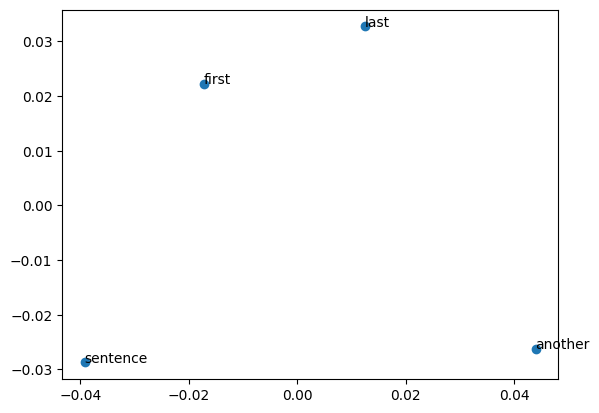

In [ ]:
model = Word2Vec(sentences=processed_corpus, vector_size=100, window=5, min_count=1, workers=4)

words = ['sentence', 'first', 'another', 'last']

vectors = [model.wv[word] for word in words]

# Perform PCA
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

# Create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()


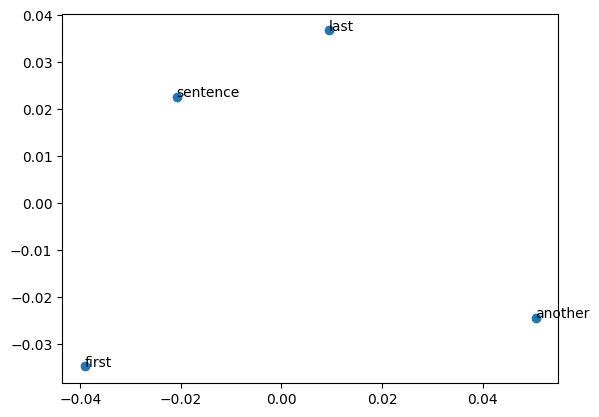

In [ ]:
model = Doc2Vec(tagged_corpus, vector_size=90, window=2, min_count=1, workers=4)

words = ['first', 'sentence', 'another', 'last']

vectors = [model.wv[word] for word in words]

pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()
